In [1]:
import numpy as np
import cv2

In [3]:
x = np.array([-1.5, 1.6])
y = np.array([-1.2, 1.2])
z = np.abs(x-y)
print(z)

[0.3 0.4]


In [29]:
def uaci_evaluation1(img1, img2):
    diff = np.abs(img1 - img2)
    diff = np.sum(diff)
    total = 255 * img1.shape[0] * img2.shape[1]
    print(diff)
    print(total)
    uaci = np.sum(diff) / (255 * img1.shape[0] * img2.shape[1])
    
    return uaci

In [9]:
def uaci_evaluation2(img1, img2):
    # Convert the images to numpy arrays
    original_arr = np.array(img1)
    stego_arr = np.array(img2)

    # Calculate the MSE between the images
    mse = np.mean((original_arr - stego_arr) ** 2)

    # Calculate the UACI score
    uaci = 1 - mse / (255.0 ** 2)

    return uaci

In [56]:
img1 = cv2.imread('wand_ori.png', 0)
img2 = cv2.imread('temp_img.png', 0)

In [46]:
img1 = cv2.imread('wand_ori.png', cv2.COLOR_RGB2GRAY)
img2 = cv2.imread('temp_img.png', cv2.COLOR_RGB2GRAY)

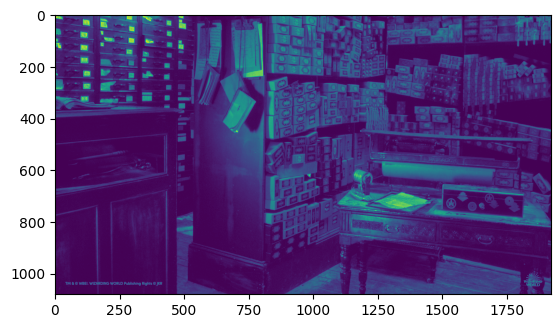

In [50]:
from matplotlib import pyplot as plt
plt.imshow(img1)

In [57]:
uaci1 = uaci_evaluation1(img1, img2)
print(uaci1)

229835373
528768000
0.4346620313634713


In [52]:
def uaci_evaluation3(img1, img2):
    original_arr = np.asarray(img1)
    stego_arr = np.asarray(img2)

    diff = np.abs(original_arr - stego_arr)

    uaci = np.sum(diff) / (255 * img1.shape[0] * img2.shape[1])

    return uaci

In [112]:
uaci2 = uaci_evaluation1(img1, img2)
print(uaci2)

7.952826192205277e-05


In [13]:
def npcr_evaluation(img1, img2):
    # Convert the images to numpy arrays
    original_arr = np.array(img1)
    stego_arr = np.array(img2)

    # Calculate the number of pixels that have changed
    num_changed_pixels = np.sum(original_arr != stego_arr)
    
    # Calculate the total number of pixels
    total_pixels = stego_arr.shape[0] * stego_arr.shape[1]

    # Calculate the NPCR score
    npcr = (num_changed_pixels / total_pixels) * 100

    return npcr

In [22]:
def npcr_evaluation2(img1, img2):
    # Convert the images to numpy arrays
    original_arr = np.asarray(img1)
    stego_arr = np.asarray(img2)

    # Calculate the number of pixels that have changed
    d_px = 0
    for x in range(original_arr.shape[0]):
        for y in range(original_arr.shape[1]):
            if (original_arr[x][y] == stego_arr[x][y]).all():
                d_px += 1
    
    # Calculate the total number of pixels
    total_pixels = stego_arr.shape[0] * stego_arr.shape[1]

    # Calculate the NPCR score
    npcr = (d_px / total_pixels) * 100

    return npcr

In [86]:
npcr = npcr_evaluation2(img1, img2)
print(npcr)

2.7182195216049383
